<a href="https://colab.research.google.com/github/thunderdog101/Machine-Learning/blob/main/TelecomChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [40]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/thunderdog101/database/main/Telco-Customer-Churn.csv')

In [41]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(int)

ValueError: ignored

In [45]:
# churn_data['MonthlyCharges'].unique().shape
# churn_data["MonthlyCharges"] = churn_data["MonthlyCharges"].astype(int)
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151.65,Yes


In [4]:
numerical_cols = churn_data.columns[churn_data.dtypes=='int64'].tolist()
numerical_cols

['SeniorCitizen', 'tenure']

In [6]:
churn_data.shape

(7043, 21)

In [7]:
churn_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Pre-processing

In [8]:
numerical_cols = churn_data.columns[churn_data.dtypes=='int64'].tolist()
numerical_cols

['SeniorCitizen', 'tenure']

In [9]:
del churn_data['customerID']

In [10]:
categorical_cols = churn_data.columns[churn_data.dtypes=='object'].tolist()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [11]:
multi_valued_columns = churn_data[categorical_cols].nunique()[churn_data[categorical_cols].nunique() > 2].index.tolist()
multi_valued_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'TotalCharges']

In [20]:
churn_data['PaymentMethod'].unique().shape

(4,)

In [13]:
binary_columns = churn_data[categorical_cols].nunique()[churn_data[categorical_cols].nunique() == 2].index.tolist()
binary_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [14]:
# transform binary col
for column in binary_columns:
  churn_data[column] = LabelEncoder().fit_transform(churn_data[column])

In [15]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [75]:
dummies_adjusted_data = pd.get_dummies(data = churn_data, columns=multi_valued_columns, drop_first=True)
dummies_adjusted_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_100.2,TotalCharges_100.25,TotalCharges_100.35,TotalCharges_100.4,TotalCharges_100.8,TotalCharges_100.9,TotalCharges_1001.2,TotalCharges_1001.5,TotalCharges_1003.05,TotalCharges_1004.35,...,TotalCharges_973.35,TotalCharges_973.45,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_979.5,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_980.35,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_993.15,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,0,1,0,1,0,1,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,2,1,1,53.85,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,1,1,70.70,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7039,0,0,1,1,72,1,1,103.20,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7040,0,0,1,1,11,0,1,29.60,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,74.40,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
std = StandardScaler()
scaled = std.fit_transform(dummies_adjusted_data[numerical_cols])
scaled = pd.DataFrame(scaled, columns=numerical_cols)
scaled

,SeniorCitizen,tenure
0,-0.439916,-1.277445
1,-0.439916,0.066327
2,-0.439916,-1.236724
3,-0.439916,0.514251
4,-0.439916,-1.236724
...,...,...
7038,-0.439916,-0.340876
7039,-0.439916,1.613701
7040,-0.439916,-0.870241
7041,2.273159,-1.155283


In [77]:
#dropping original values merging scaled values for numberical columns
dummies_adjusted_dataog = dummies_adjusted_data.copy()
data = dummies_adjusted_data.drop(columns = numerical_cols,axis = 1)
data = data.merge(scaled,left_index=True, right_index=True, how = "left")
# data = data.drop(['EmployeeNumber'],axis = 1) 
data

,gender,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges_100.2,TotalCharges_100.25,TotalCharges_100.35,TotalCharges_100.4,TotalCharges_100.8,TotalCharges_100.9,TotalCharges_1001.2,TotalCharges_1001.5,TotalCharges_1003.05,TotalCharges_1004.35,TotalCharges_1004.5,TotalCharges_1004.75,...,TotalCharges_973.55,TotalCharges_973.65,TotalCharges_973.95,TotalCharges_978,TotalCharges_978.6,TotalCharges_979.05,TotalCharges_979.5,TotalCharges_98.35,TotalCharges_98.5,TotalCharges_980.35,TotalCharges_981.45,TotalCharges_982.95,TotalCharges_985.05,TotalCharges_987.95,TotalCharges_989.05,TotalCharges_989.45,TotalCharges_99.45,TotalCharges_99.6,TotalCharges_99.75,TotalCharges_99.95,TotalCharges_990.3,TotalCharges_990.45,TotalCharges_990.85,TotalCharges_990.9,TotalCharges_992.7,TotalCharges_993.15,TotalCharges_994.55,TotalCharges_994.8,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,SeniorCitizen,tenure
0,0,1,0,0,1,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,-1.277445
1,1,0,0,1,0,56.95,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,0.066327
2,1,0,0,1,1,53.85,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,-1.236724
3,1,0,0,0,0,42.30,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,0.514251
4,0,0,0,1,1,70.70,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,-1.236724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,84.80,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,-0.340876
7039,0,1,1,1,1,103.20,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,1.613701
7040,0,1,1,0,1,29.60,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.439916,-0.870241
7041,1,1,0,1,1,74.40,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.273159,-1.155283


# Multicollinearity

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix)
plt.show()

In [18]:
cols_to_melt = corr_matrix.columns
corr_matrix = corr_matrix.reset_index()

In [19]:
corr_matrix_melted = corr_matrix.melt( id_vars='index', value_vars=cols_to_melt)
corr_matrix_melted = corr_matrix_melted[corr_matrix_melted['index'] != corr_matrix_melted['variable']]
correlations_above_threshold = corr_matrix_melted[corr_matrix_melted.value.abs() > .8]
columns_to_drop = correlations_above_threshold['index'].to_list()
columns_to_drop

['Department_Sales',
 'Department_Research & Development',
 'JobRole_Sales Executive',
 'Department_Sales',
 'MonthlyIncome',
 'JobLevel']

In [20]:
data.drop(columns=columns_to_drop, inplace=True)

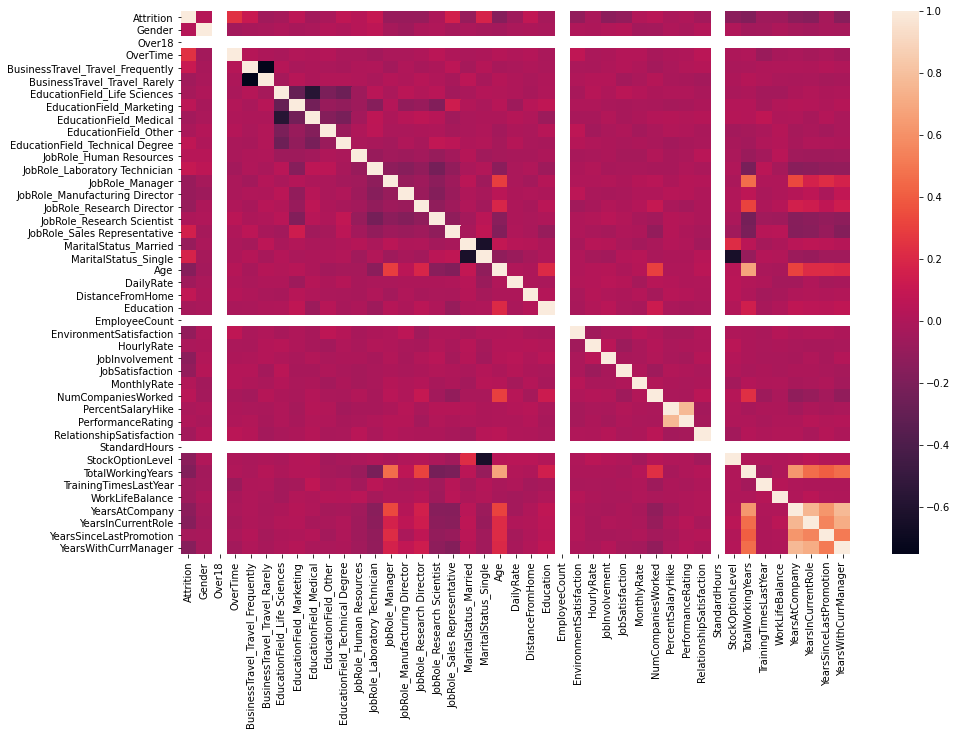

In [21]:
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix)
plt.show()

# Unbalanced data

In [22]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [23]:
positive_labels = data[data.Attrition==1]
num_positive_labels = positive_labels.shape[0]
num_positive_labels

237

In [24]:
negative_labels = data[data.Attrition==0].sample(num_positive_labels)
negative_labels.shape

(237, 43)

In [25]:
balanced_data = positive_labels.append(negative_labels)

# Splitting data into test splits

In [26]:
balanced_data.head()

,Attrition,Gender,Over18,OverTime,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.446350,0.742527,-1.010909,-0.891688,0.0,-0.660531,1.383138,0.379672,1.153254,0.726020,2.125136,-1.150554,-0.426230,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
2,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.008343,1.414363,-0.887515,-0.891688,0.0,1.169781,1.284725,-1.026167,0.246200,-1.674841,1.324226,-0.057267,-0.426230,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
14,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.977174,-1.734097,1.827158,0.085049,0.0,0.254625,-0.781948,-1.026167,0.246200,-0.191993,0.923771,-0.330589,-0.426230,-0.658973,0.0,-0.932014,-0.678774,0.931603,0.338096,-0.491174,-0.615492,-0.679146,-0.314873
21,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.101159,1.030102,-0.023755,1.061787,0.0,0.254625,0.792660,-1.026167,-1.567907,-1.029758,1.724681,2.129306,2.346151,-0.658973,0.0,-0.932014,-0.164511,0.931603,0.338096,-0.327893,-0.339394,-0.679146,-0.314873
24,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,-0.320163,-0.256552,-0.393938,-1.868426,0.0,-0.660531,0.841867,0.379672,-1.567907,0.391954,-0.277594,-1.150554,-0.426230,0.266233,0.0,-0.932014,-0.421642,-0.620189,0.338096,-0.491174,-0.615492,-0.368715,-0.314873


In [27]:
y = balanced_data.pop('Attrition')
X = balanced_data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
X_train.head()

,Gender,Over18,OverTime,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
239,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.539166,-0.712706,-1.010909,0.085049,0.0,1.169781,-0.191470,-1.026167,0.246200,-0.666460,-1.078504,-0.330589,-0.42623,1.191438,0.0,-0.932014,-0.935905,-0.620189,-2.493820,-0.654454,-0.615492,-0.368715,-0.595227
514,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.429664,0.678070,-0.764121,0.085049,0.0,-1.575686,0.202182,0.379672,-1.567907,-1.566905,-0.678049,-1.150554,-0.42623,-1.584178,0.0,-0.932014,-0.164511,0.155707,0.338096,0.488508,1.041095,2.114728,0.806541
487,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,-1.853188,0.388015,-1.010909,0.085049,0.0,1.169781,0.841867,-1.026167,-0.660853,-0.359237,-0.678049,-0.603911,-0.42623,1.191438,0.0,-0.932014,-1.321601,-2.171982,1.754054,-0.981014,-1.167687,-0.679146,-1.155935
946,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.336849,-1.248193,1.950552,1.061787,0.0,1.169781,-0.437503,-1.026167,-0.660853,0.410646,-0.277594,-0.877232,-0.42623,0.266233,0.0,-0.932014,-0.293077,-0.620189,0.338096,-0.327893,-0.063296,-0.368715,-1.155935
1044,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.322365,1.716814,-0.517332,1.061787,0.0,-1.575686,1.481551,0.379672,0.246200,1.014832,-0.277594,-0.330589,-0.42623,-0.658973,0.0,0.241988,1.121144,-2.171982,-1.077862,-0.654454,-0.615492,-0.368715,-0.595227


In [30]:
# fit a model
clf = LogisticRegression(random_state=0, penalty='l2').fit(X_train, y_train)
# predict probabilities
predictions = clf.predict_proba(X_test)[:,1]

In [31]:
y_pred = clf.predict(X_test)

In [32]:
# Confusion matrix

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,50,14
1,12,43


In [33]:
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'] , margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,50,14,64
1,12,43,55
All,62,57,119


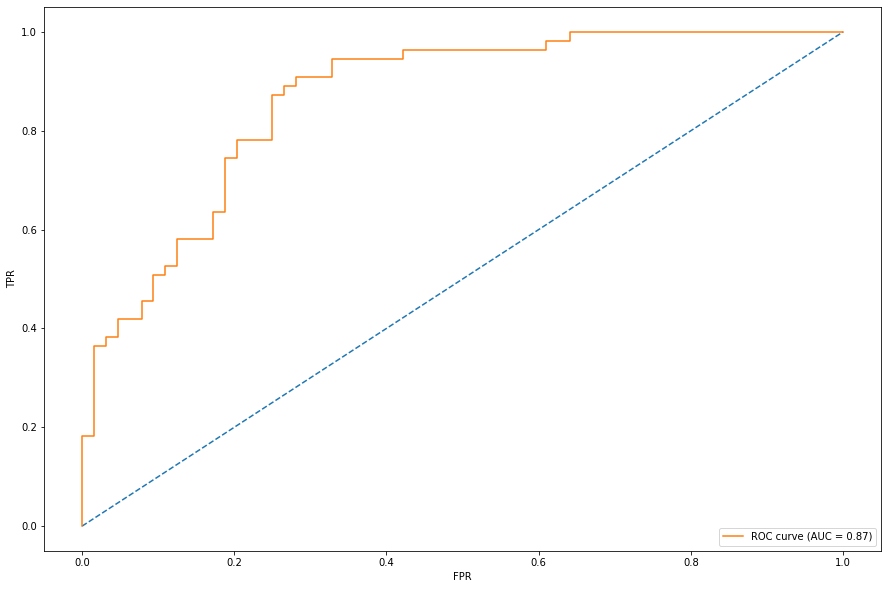

In [34]:
# calculate scores
auc = roc_auc_score(y_test, predictions)

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, predictions)

plt.figure(figsize=(15,10))
# plot horizontal line
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

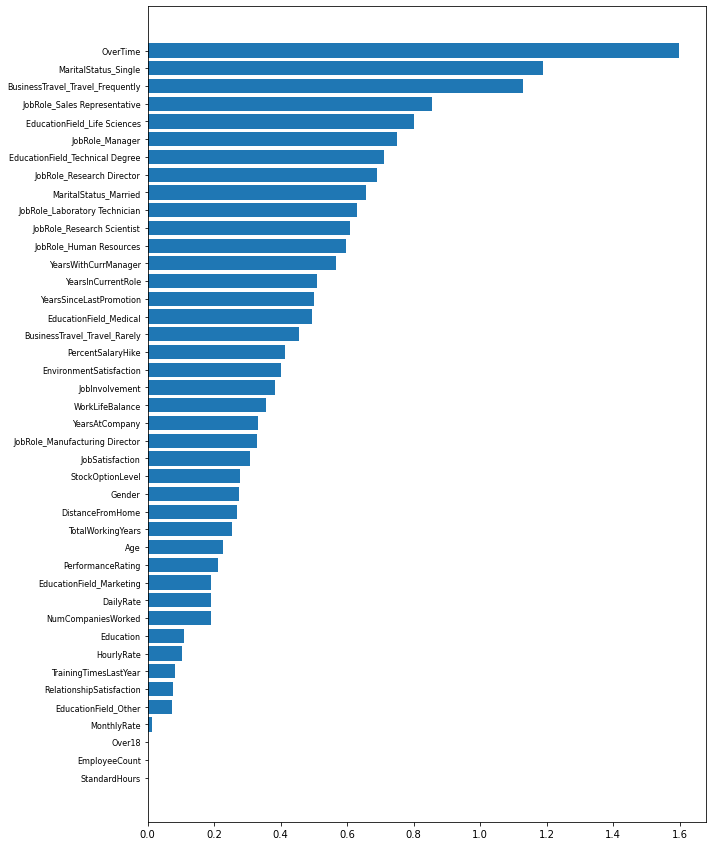

In [37]:
feature_importance = abs(clf.coef_[0])
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

featfig = plt.figure(figsize=(10,15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

plt.show()